## Optimizer
* SGD
* Momentum
* Adagrad
* RMSProp
* Adam

Momentum 계열 : 속도를 최대한 빠르게
* SGD, Momentum, NAG, Nadam, `Adam`

Adaptive 계열 : 방향을 최대한 일직선
* Adagrad, AdaDelta, RMSProp, `Adam`

## 연립방정식의 근사해 찾기
1. 최소제곱법
2. 선형회귀

2.428571428571438 78.99999999999997


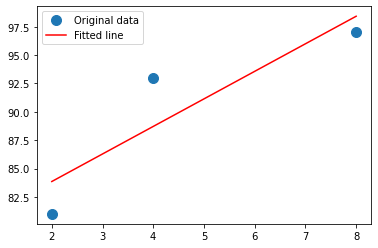

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x = np.array([2, 4, 8])
A = np.array([[1]*len(x), x]).T
y = np.array([81, 93, 97])

c, m = np.linalg.lstsq(A, y, rcond=None)[0]
print(m, c)

plt.plot(x, y, 'o', label='Original data', markersize=10)
plt.plot(x, m*x + c, 'r', label='Fitted line')
plt.legend()
plt.show()

In [2]:
import numpy as np

x = np.array([2, 4, 8])
A = np.array([[1]*len(x), x]).T
y = np.array([81, 93, 97])

print(np.matmul(A.T, A))
print(np.matmul(A.T, y))
print(np.linalg.inv(np.matmul(A.T, A)))
# [ 3/2, -1/4]
# [-1/4, 3/56]
print(np.matmul(np.linalg.inv(np.matmul(A.T, A)), np.matmul(A.T, y)))
# (79, 17/7)

[[ 3 14]
 [14 84]]
[ 271 1310]
[[ 1.5        -0.25      ]
 [-0.25        0.05357143]]
[79.          2.42857143]


### 선형회귀

In [3]:
import numpy as np

# 관측된 x, y를 데이터로 삼습니다.
x_train = np.array([2, 4, 8])
y_train = np.array([81, 93, 97])

# 학습해야 할 파라미터 W, b를 놓고
W, b = np.array([0.0, 0.0])
n_data = len(x_train)
epochs = 2000
learning_rate = 0.01

# 루프를 돌면서 
for i in range(epochs):
    hypothesis = x_train * W + b
    cost = np.sum((hypothesis - y_train) ** 2) / n_data
    # gradient를 계산하여
    gradient_w = np.sum((W * x_train - y_train + b) * 2 * x_train) / n_data
    gradient_b = np.sum((W * x_train - y_train + b) * 2) / n_data

    if i % 100 == 0:
        print('Epoch ({:10d}/{:10d}) cost: {:10f}, W: {:10f}, b:{:10f}'.format(i, epochs, cost, W, b))

    # 그래디언트 반대 방향으로 파라미터를 업데이트합니다. 
    W -= learning_rate * gradient_w
    b -= learning_rate * gradient_b


print('W: {:10f}'.format(W))
print('b: {:10f}'.format(b))
print('result : ', x_train * W + b)

Epoch (         0/      2000) cost: 8206.333333, W:   0.000000, b:  0.000000
Epoch (       100/      2000) cost: 555.446152, W:  10.752730, b: 29.440640
Epoch (       200/      2000) cost: 239.027498, W:   7.825787, b: 46.866718
Epoch (       300/      2000) cost: 106.006292, W:   5.928016, b: 58.165432
Epoch (       400/      2000) cost:  50.084681, W:   4.697540, b: 65.491290
Epoch (       500/      2000) cost:  26.575446, W:   3.899725, b: 70.241227
Epoch (       600/      2000) cost:  16.692253, W:   3.382437, b: 73.320989
Epoch (       700/      2000) cost:  12.537396, W:   3.047039, b: 75.317845
Epoch (       800/      2000) cost:  10.790710, W:   2.829573, b: 76.612565
Epoch (       900/      2000) cost:  10.056410, W:   2.688573, b: 77.452036
Epoch (      1000/      2000) cost:   9.747713, W:   2.597151, b: 77.996332
Epoch (      1100/      2000) cost:   9.617938, W:   2.537875, b: 78.349242
Epoch (      1200/      2000) cost:   9.563381, W:   2.499442, b: 78.578062
Epoch (    

* 회귀 모델의 loss function은 주로 `MSE`
* 회귀 모델의 학습 방법은 주로 `GD`

## Optimizer
* GD
* SGD(Stochastic Gradient Descent) : GD는 한 번 step에 전체 훈련 데이터에 대한 loss function을 계산해야 하므로 계산량이 너무 많다. 이를 방지하기 위해 사용.
    * 전체 데이터 대신 일부분을 잘라 조그마한 데이터의 모음(mini-batch)에 대해서만 손실함수를 계산한다.
    * GD에 비해 다소 부정확할 수는 있지만, 훨씬 계산 속도가 빠르다.
    * 여러 번 반복할 경우 일반 GD의 결과와 유사한 결과로 수렴한다.
    * 일반적인 뉴럴넷의 baseline으로 사용되는 함수.

실제 neural network에서는 local minima에 빠질 확률이 거의 없다. NN의 weight(파라미터 수)가 너무 많아서 local minima에 해당하는 파라미터(모든 방향으로 loss가 0인 값)으로 수렴하는 것이 사실상 불가능하기 때문.

오히려 문제가 되는 것은 평지(`Plateau`, saddle point)가 생겨서 weight 업데이트가 거의 일어나지 않는 현상이다.

이를 해결하기 위한 방법

* Momentum : 원래 가던 방향으로 가려는 관성을 가지고 GD
    * 과거에 이동햇던 방식을 기억하면서 그 방향으로 일정 정도를 추가적으로 이동.
    * 관성항으로 보통 `0.9`정도의 값을 사용.
    * 관성 효과로 인해 양의 방향과 음의 방향 순차적으로 일어나는 지그재그 현상이 줄어든다.
* Adagrad : 변수들을 업데이트 할 때 각각의 변수마다 step size를 다르게 설정해서 이동.
    * 지금까지 많이 변화하지 않은 변수들은 step size를 크게, 많이 변화한 변수들은 step size를 작게
    * 자주 등장하거나 많이 변화한 변수들은 optimum에 가까이 있을 확률이 높기 때문에 작은 크기로 이동하면서 세밀한 값을 조정
    * 적게 변화한 변수들은 optimum값에 도달하기 위해서 많이 이동해야 할 확률이 높기 때문에 먼저 빠르게 loss값을 줄인다.
    * `word2vec`이나 `GloVe`같이 word representation을 학습시킬 경우 단어의 등장 확률에 따라 variable의 사용 비율이 확연하게 차이나기 때문에 `Adagrad`와 같은 학습 방식을 사용하면 훨씬 더 좋은 성능!!!
* RMSProp : Adagrad는 학습을 계속 진행하면 step size가 너무 줄어드는 문제점이 있다. 이를 해결하기 위한 알고리즘.
* Adam : `RMSProp + Momentum`
